# NOTE: this code is normally obscured within BioSeq-AutoML
### For maximum flexibility and so users can continue to explore the codebase, we have pulled out the relevant functionality for all intepretation module functions.

In [1]:
# import statements 
import sys
sys.path.insert(1, './main_classes/')
from BioSeqAutoML_generic_deepswarm import convert_deepswarm_input
from BioSeqAutoML_interpret_helpers import plot_rawseqlogos, get_one_bp_mismatches, get_new_mismatch_seqs
from BioSeqAutoML_generic_automl_classes import AutoMLBackend
from BioSeqAutoML_generic_automl_classes import process_glycans, checkValidity, fill, makeComplement
from BioSeqAutoML_constraints_for_design_helpers import *
from BioSeqAutoML_interpret_helpers import plot_mutagenesis, plot_rawseqlogos, plot_activation_maps, plot_saliency_maps, plot_seqlogos
from BioSeqAutoML_seqprop_helpers import *
from BioSeqAutoML_integrated_design_helpers import *

Using TensorFlow backend.


Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


# Immunogenic glycans

In [2]:
# read in data file
data_dir = './clean_data/clean/'
file_name = 'immunogenic_glycans.csv'
data_df = pd.read_csv(data_dir + file_name,sep=',')
display(data_df.head(3))

# give inputs for data generation
input_col_name = 'seq'
df_data_input = data_df[input_col_name]
df_data_output = data_df['target']
pad_seqs = 'max'
augment_data = 'none'
sequence_type = 'glycan'

# give inputs for paths
final_model_path = './exemplars/glycans_immunogenic/outputs/deepswarm/binary_classification/'
final_model_name = 'deepswarm_deploy_model.h5'
model_type = 'deepswarm'
output_folder = final_model_path
plot_path = final_model_path + 'design/'

# give inputs for design options
design_params = {'k' : 3, 
                'substitution_type' : 'constrained_random',
                'target_y' : 1,
                'class_of_interest' : 1, # must be zero if task is regression, recommend to be 3 if task if multi-class classification with 4 classes
                'constraint_file_path' : '',
                'de_novo_num_seqs_to_test' : 100,
                'storm_num_seqs_to_test' : 5,
                 'num_of_optimization_rounds' : 5}

# format data inputs appropriately for autoML platform
numerical_data_input, oh_data_input, df_data_output, scrambled_numerical_data_input, scrambled_oh_data_input, alph = convert_deepswarm_input(df_data_input, df_data_output, pad_seqs, augment_data, sequence_type)

# handle numerical data inputs
numerical = []
numericalbool = True
for x in list(df_data_output.values):
    try:
        x = float(x)
        numerical.append(x)
    except Exception as e:
        numericalbool = False
        break

# now do design
integrated_design(numerical_data_input, oh_data_input, alph, numerical, numericalbool, final_model_path, final_model_name, output_folder + 'design/', '_design.png', sequence_type, model_type = 'deepswarm', design_params = design_params)


,seq,target
0,Rha(a1-2)Rha(a1-3)Rha(b1-4)Rha,1.0
1,FucNAc(a1-3)QuiNAcNBut(b1-4)FucNAc,1.0
2,[Col(a1-2)]Gal(b1-3)[Col(a1-4)]GlcNAc(b1-4)Gal...,1.0


Confirmed: All sequence characters are in alphabet
Padding all sequences to a length of 47
Confirmed: No data augmentation requested
Confirmed: Scrambled control generated.
Checking generation methods...
3 615643499843
k = 3 is too large for alphabet size and sequence length. Setting k = 1
Reading in biological constraints...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1671418206.095547 (InputLaye (None, 47, 181, 1)        0         
_________________________________________________________________
1671418206.1057138 (Conv2D)  (None, 47, 181, 64)       640       
_________________________________________________________________
1671418206.121561 (Flatten)  (None, 544448)            0         
_________________________________________________________________
1671418206.125675 (Dense

KeyboardInterrupt: 

# Glycans multi-class domain

,seq,target
0,Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc...,Eukarya
1,GlcNAc(b1-2)Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man...,Eukarya
2,GlcNAc(b1-2)Man(a1-6)[Man(a1-3)][Xyl(b1-2)]Man...,Eukarya


Example of bad letter Man: ['Man', 'a1-3', 'Man', 'a1-6', 'Xyl', 'b1-2', 'Man', 'b1-4', 'GlcNAc', 'b1-4', 'Fuc', 'a1-3', 'GlcNAc']
Truncating all sequences to a length of 11
Confirmed: No data augmentation requested
Confirmed: Scrambled control generated.
Checking generation methods...
3 568280801187
k = 3 is too large for alphabet size and sequence length. Setting k = 1
Reading in biological constraints...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.random.categorical instead.
Tensor("reshaped_input/Reshape:0", shape=(1, 11, 753, 1), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>
STORM module is not compatible with current model.
Plotting now...


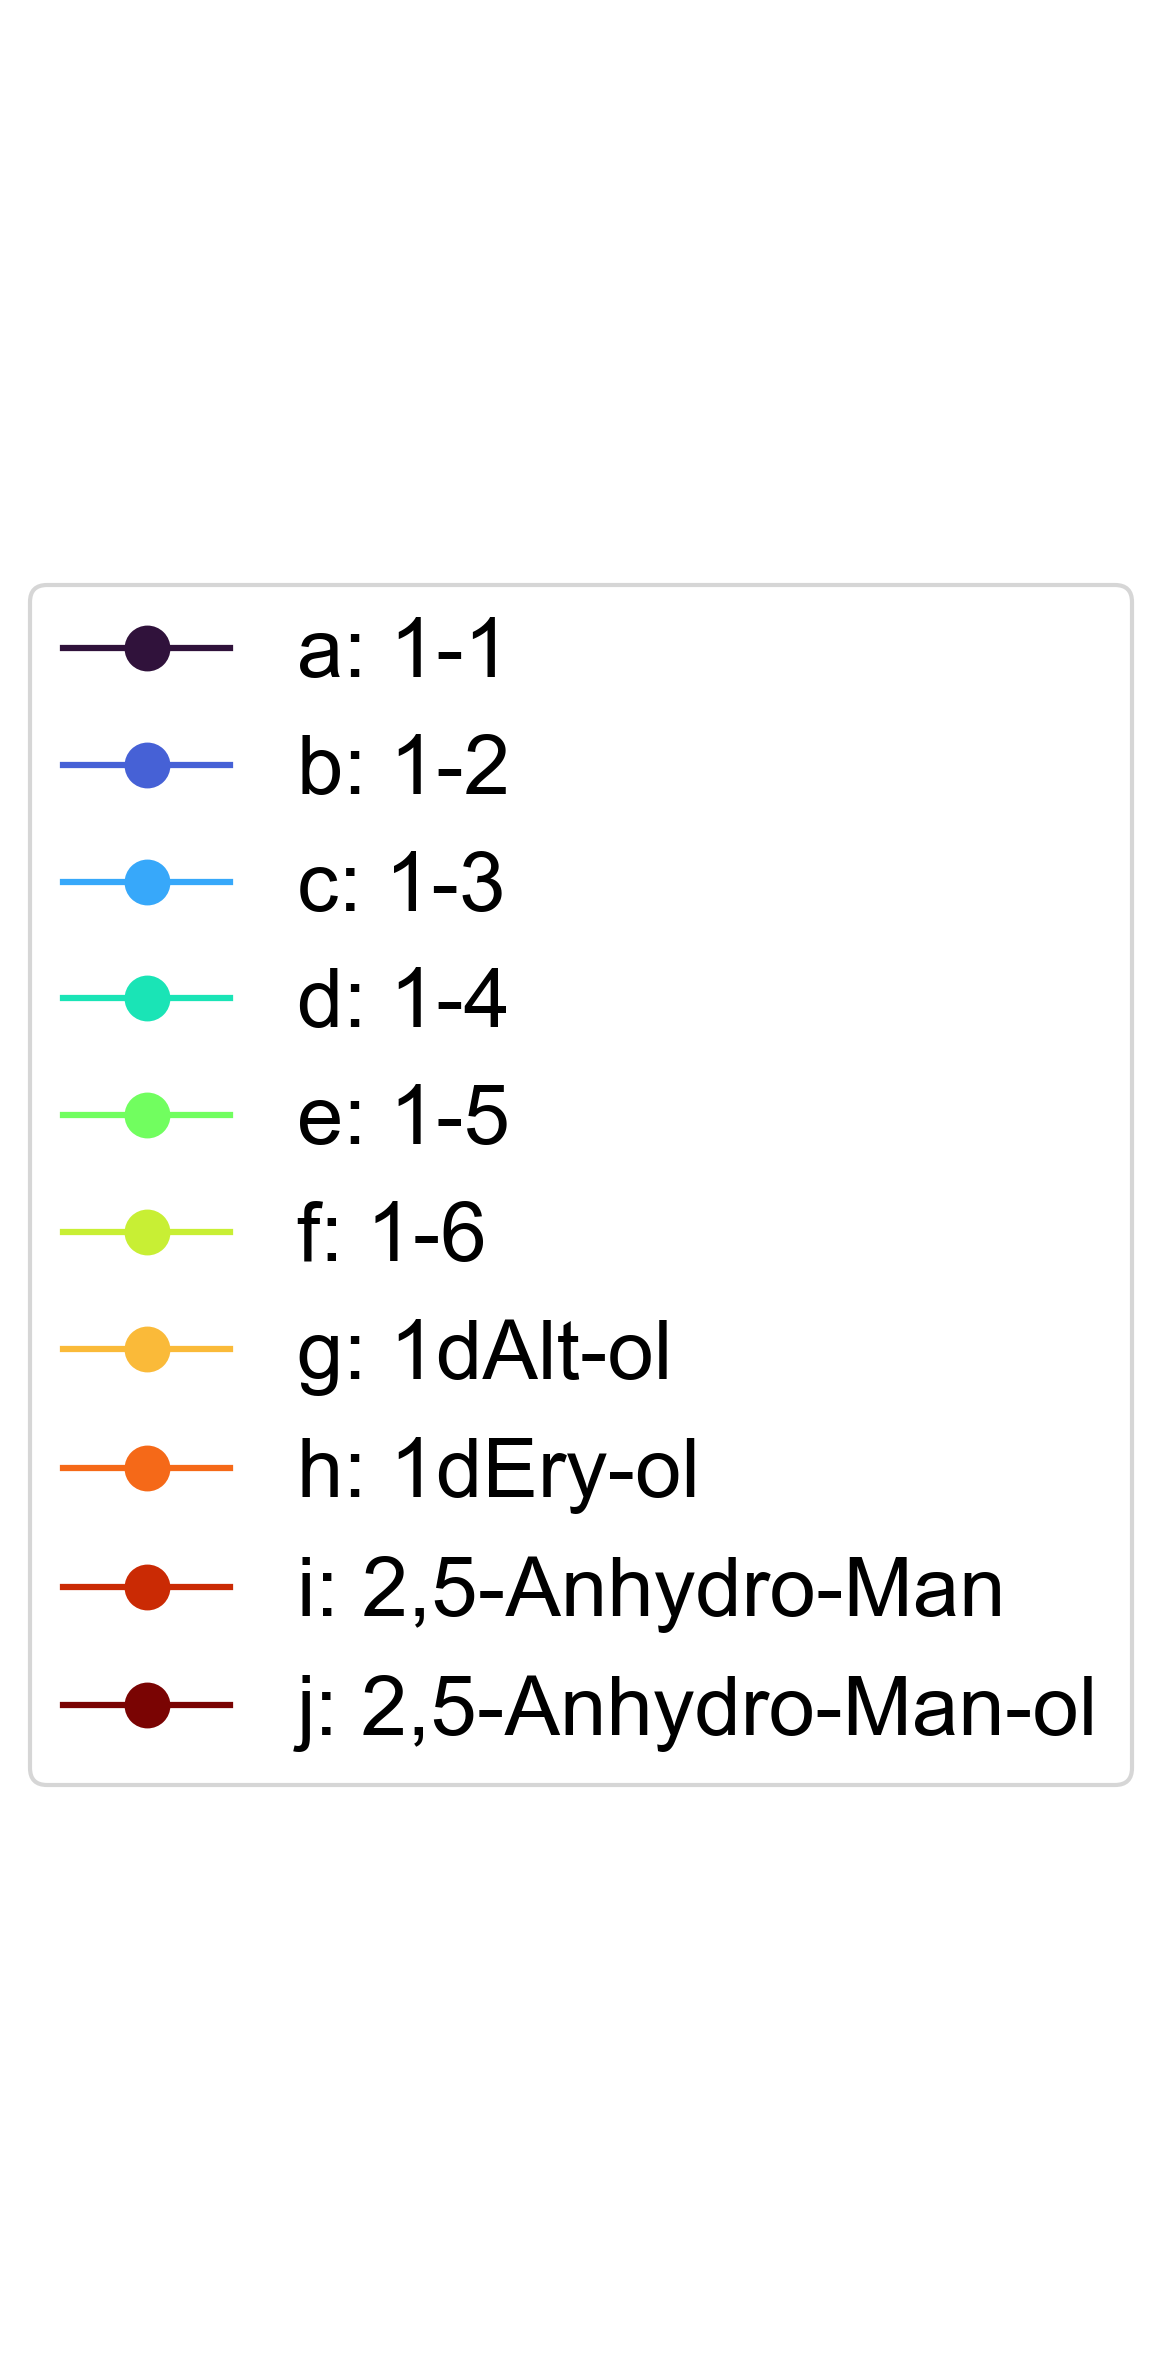

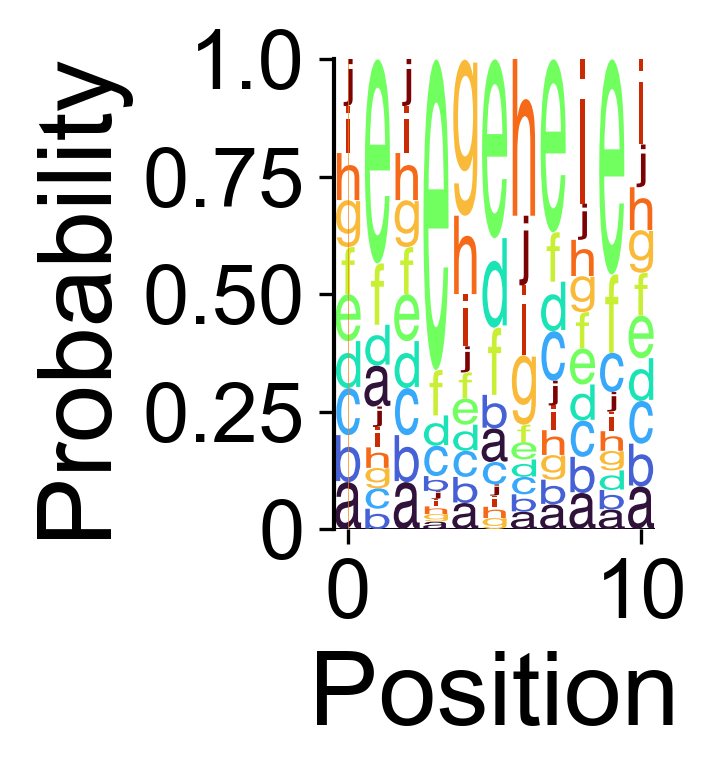

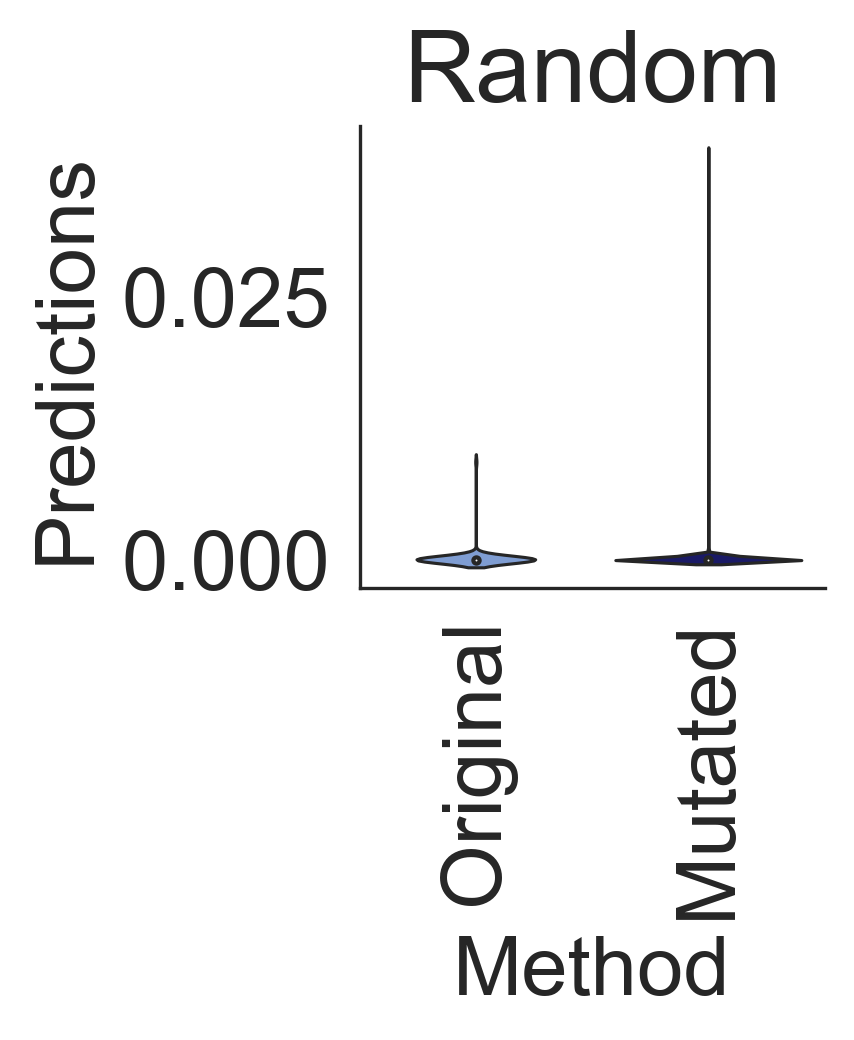

Computing statistics between different groups...
Random
Comparing original to mutated:  Ttest_indResult(statistic=-0.2628811638840032, pvalue=0.7926472452278259)


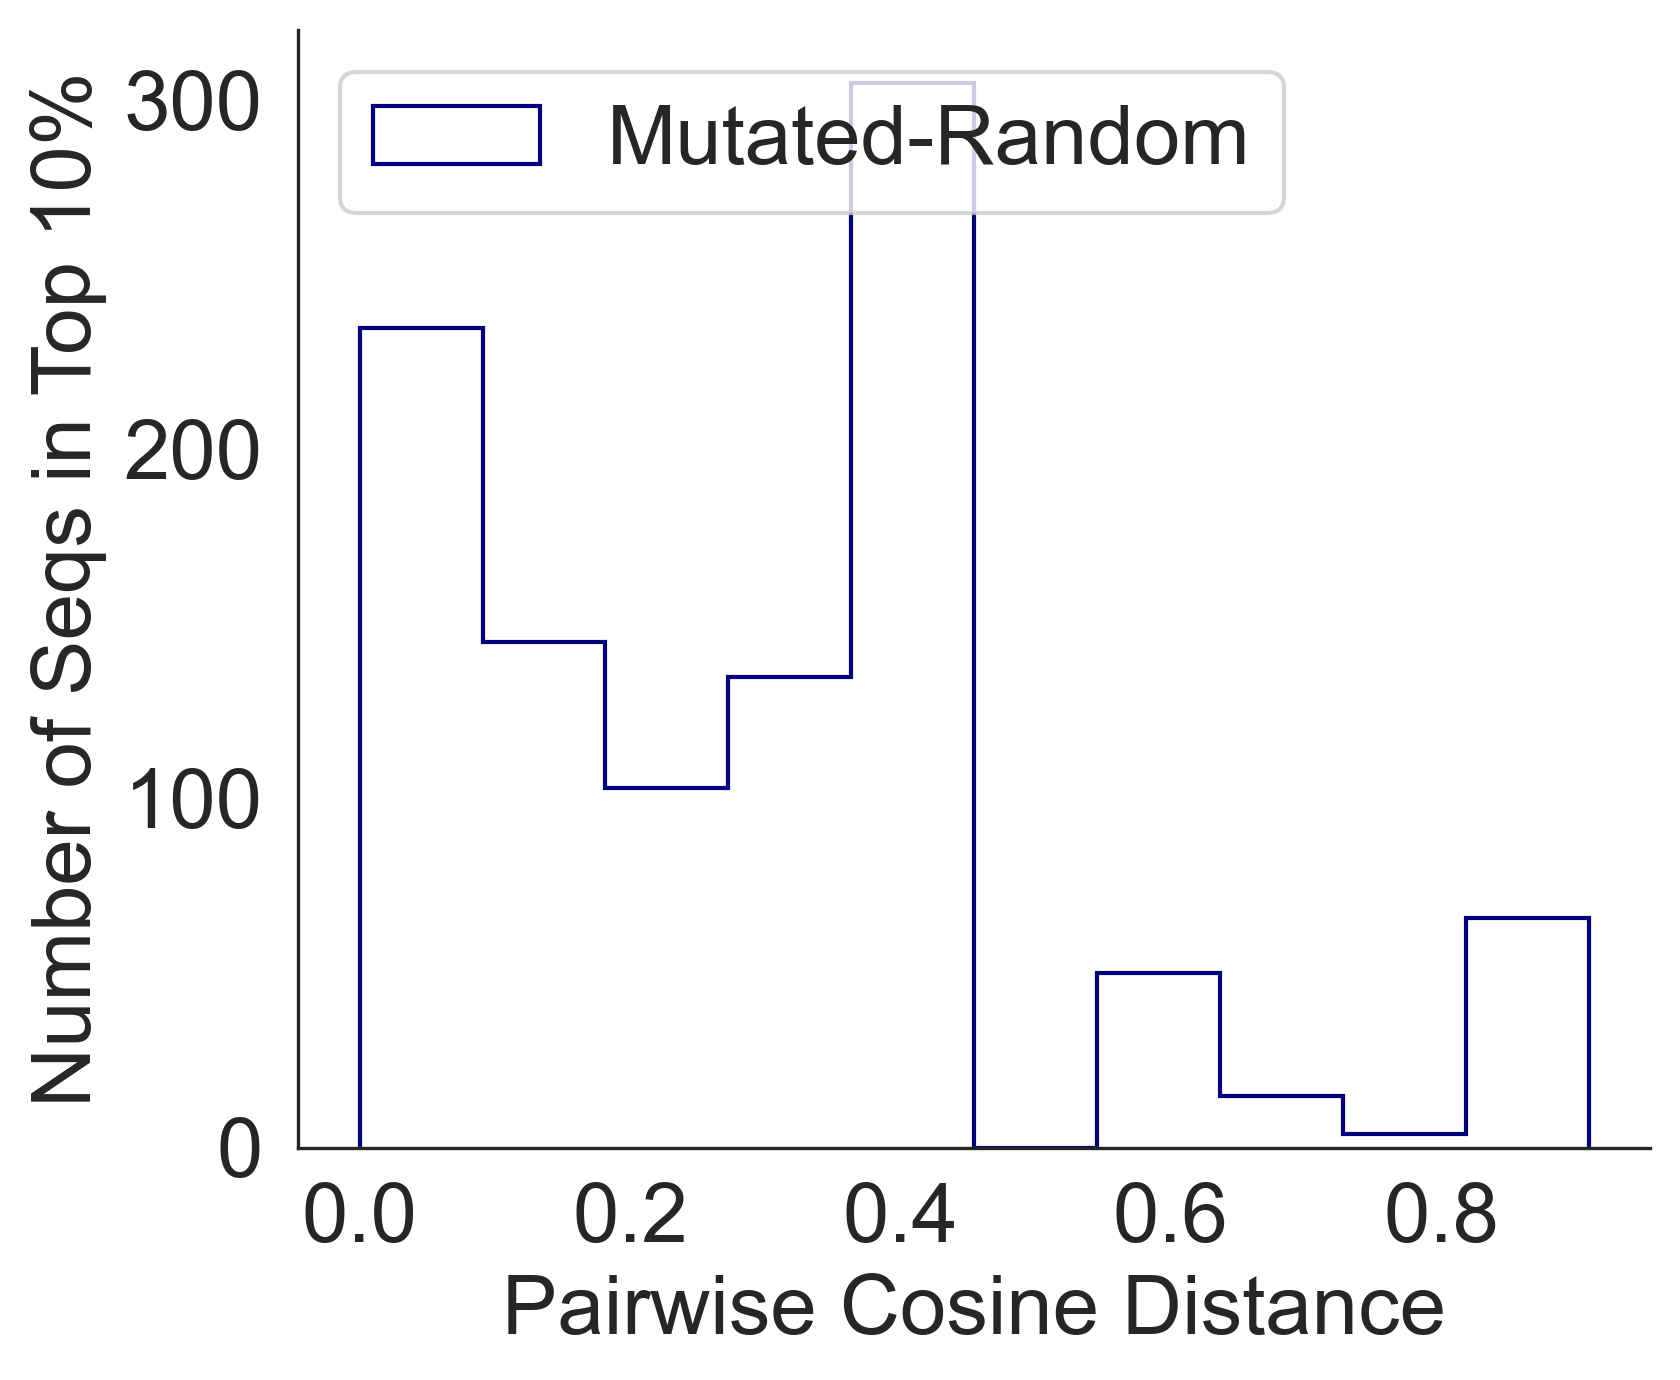

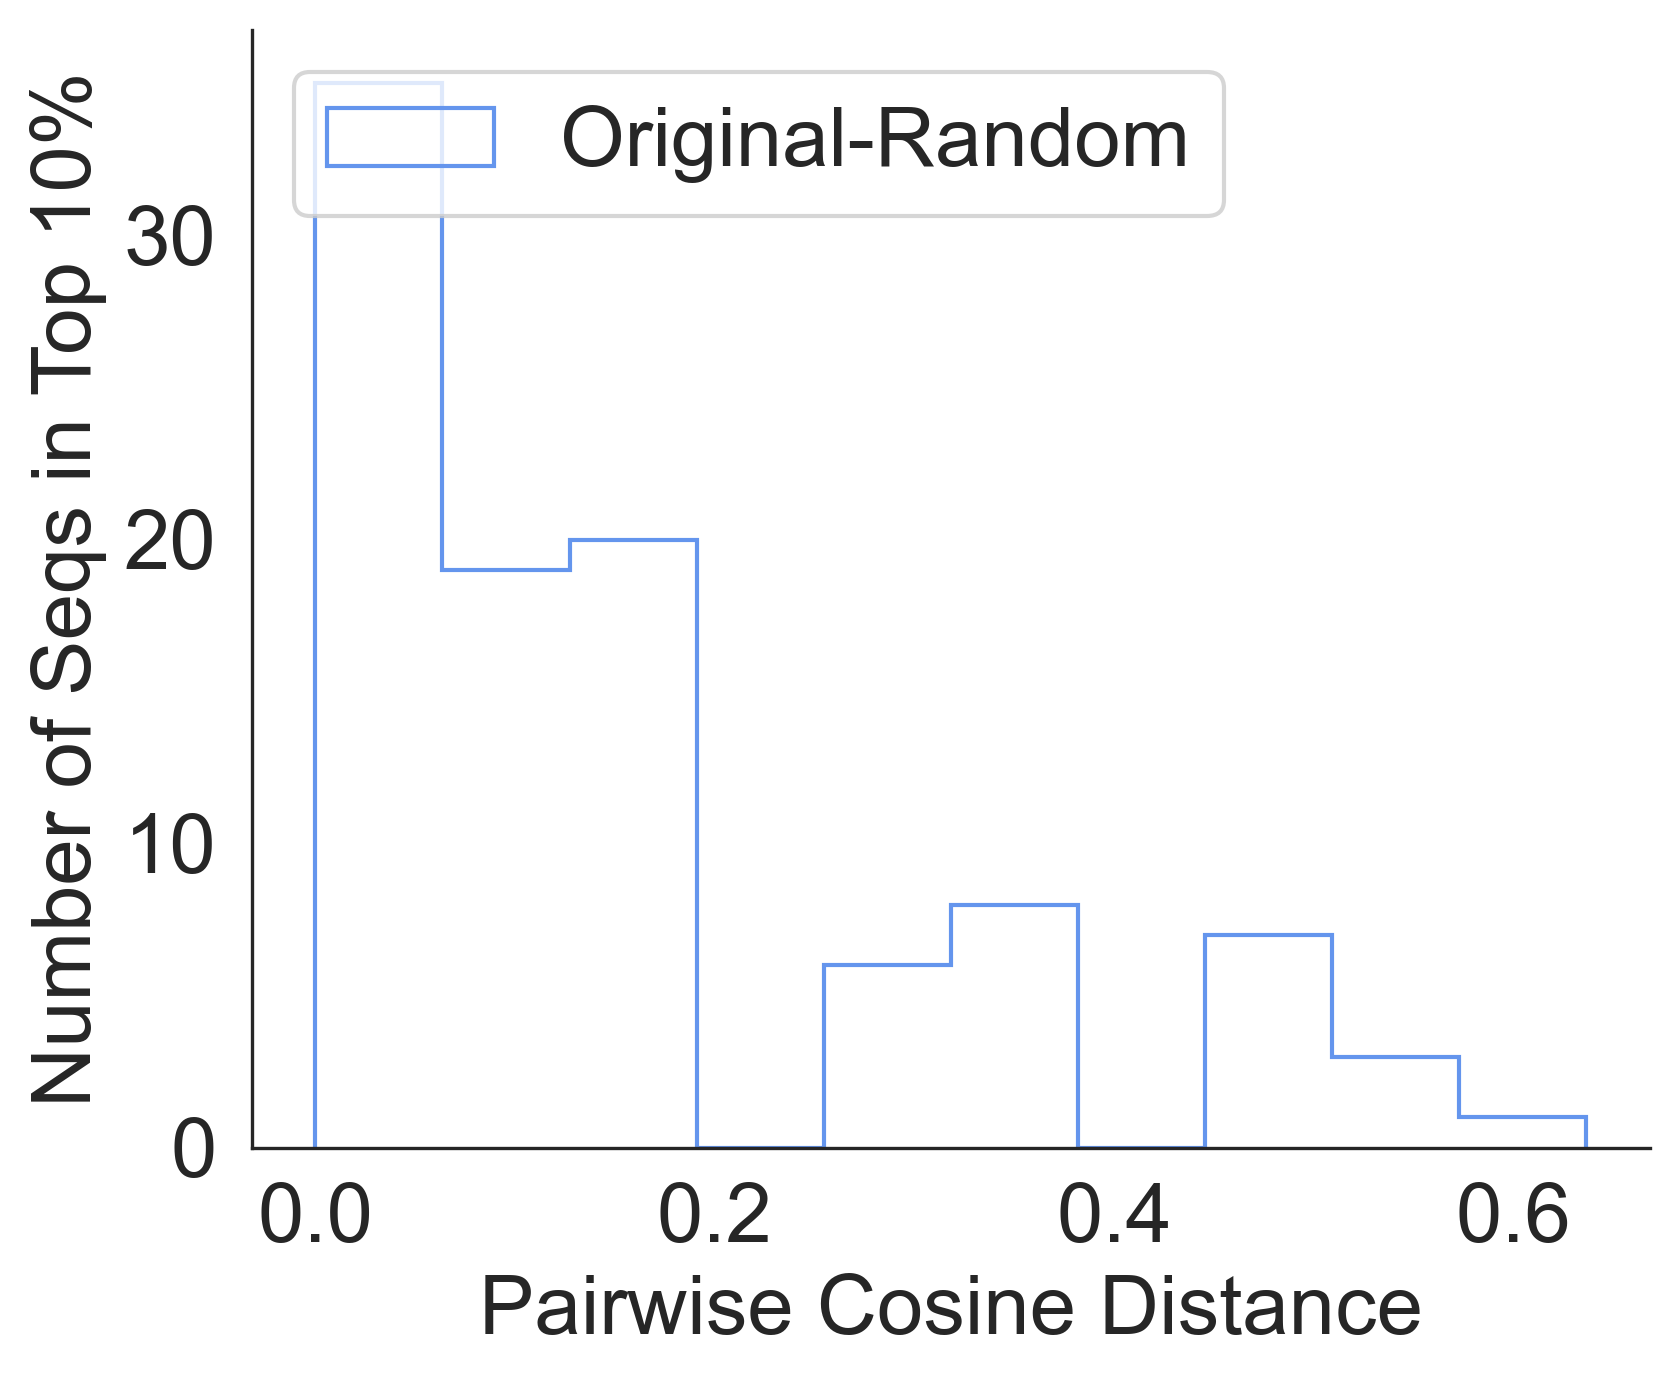

No sequence logo could be computed for Mutated-Random sequences.


In [2]:
# read in data file
data_dir = './clean_data/multiclass/'
file_name = 'domain_glycans.csv'
data_df = pd.read_csv(data_dir + file_name,sep=',')
display(data_df.head(3))

# give inputs for data generation
input_col_name = 'seq'
df_data_input = data_df[input_col_name]
df_data_output = data_df['target']
pad_seqs = 'average'
augment_data = 'none'
sequence_type = 'glycan'

# give inputs for paths
final_model_path = './exemplars/glycan_domain_average/outputs/deepswarm/multiclass_classification/'
final_model_name = 'deepswarm_deploy_model.h5'
model_type = 'deepswarm'
output_folder = final_model_path
plot_path = final_model_path + 'design/'

# give inputs for design options
design_params = {'k' : 3, 
                'substitution_type' : 'constrained_random',
                'target_y' : 1,
                'class_of_interest' : 3, # must be zero if task is regression, recommend to be 3 if task if multi-class classification with 4 classes
                'constraint_file_path' : '',
                'de_novo_num_seqs_to_test' : 100,
                'storm_num_seqs_to_test' : 5,
                 'num_of_optimization_rounds' : 5}

# format data inputs appropriately for autoML platform
numerical_data_input, oh_data_input, df_data_output, scrambled_numerical_data_input, scrambled_oh_data_input, alph = convert_deepswarm_input(df_data_input, df_data_output, pad_seqs, augment_data, sequence_type)

# handle numerical data inputss
numerical = []
numericalbool = True
for x in list(df_data_output.values):
    try:
        x = float(x)
        numerical.append(x)
    except Exception as e:
        numericalbool = False
        break

# now do design
integrated_design(numerical_data_input, oh_data_input, alph, numerical, numericalbool, final_model_path, final_model_name, output_folder + 'design/', '_design.png', sequence_type, model_type = 'deepswarm', design_params = design_params)

# Toeholds - binary classification example

Confirmed: All sequence characters are in alphabet
Confirmed: No need to pad or truncate, all sequences same length
Confirmed: No data augmentation requested
Confirmed: Scrambled control generated.
Checking generation methods...
3 13144256
k = 3 is too large for alphabet size and sequence length. Setting k = 2
Reading in biological constraints...
Confirmed: All sequence characters are in alphabet
Confirmed: All sequence characters are in alphabet
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.random.categorical instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/50
1000/1000 [==============================] - 1s 1ms/step - loss: 1.0000
Epoch 2/50
1000/1000 [==============================] - 1s 922us/step - loss: 0.8639
Epoch 3/50
1000/1000 [==============================] - 1s 920us/step - loss: 0.0017
Epoch 4/50
1000/1000 [==============

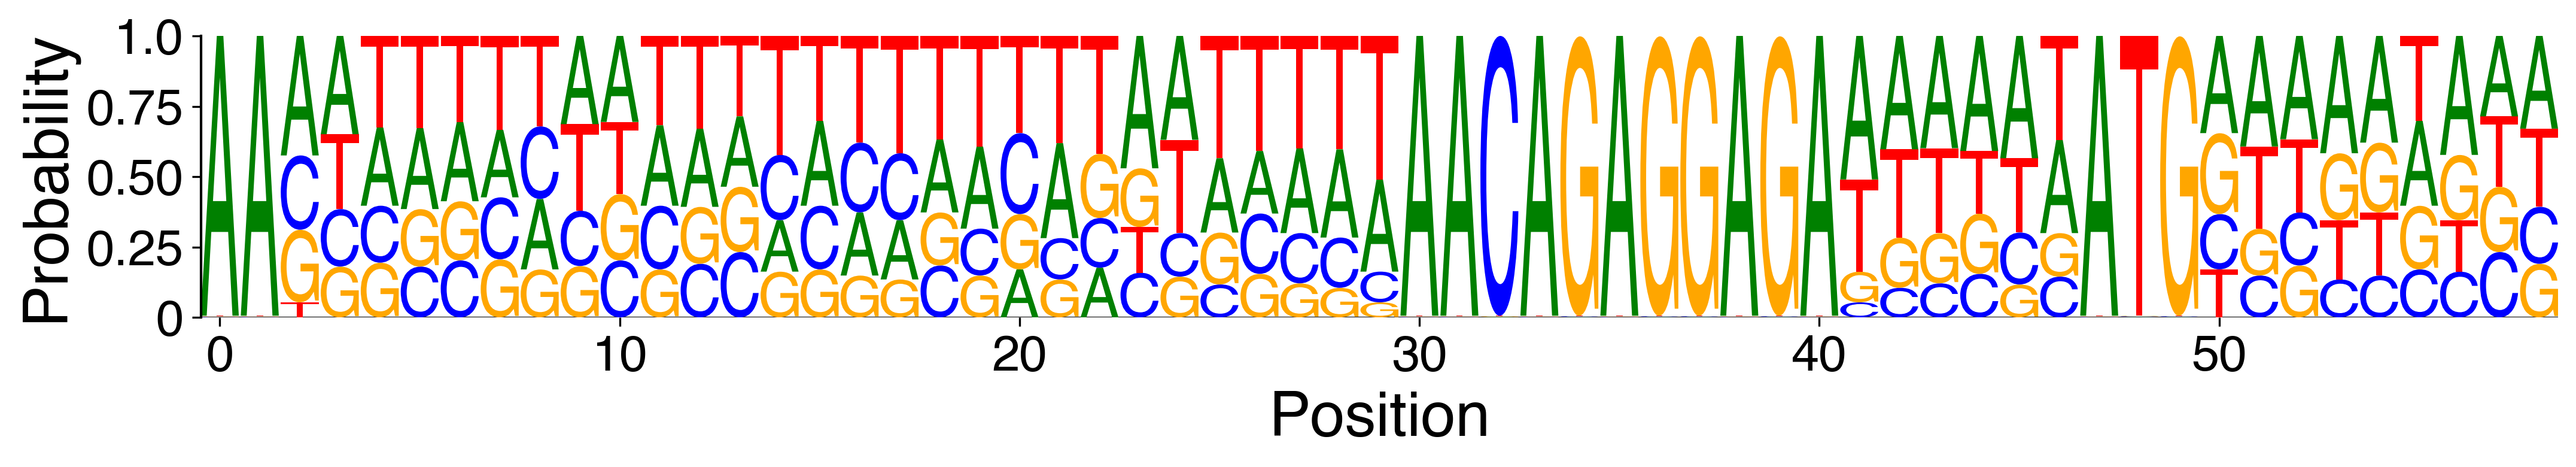

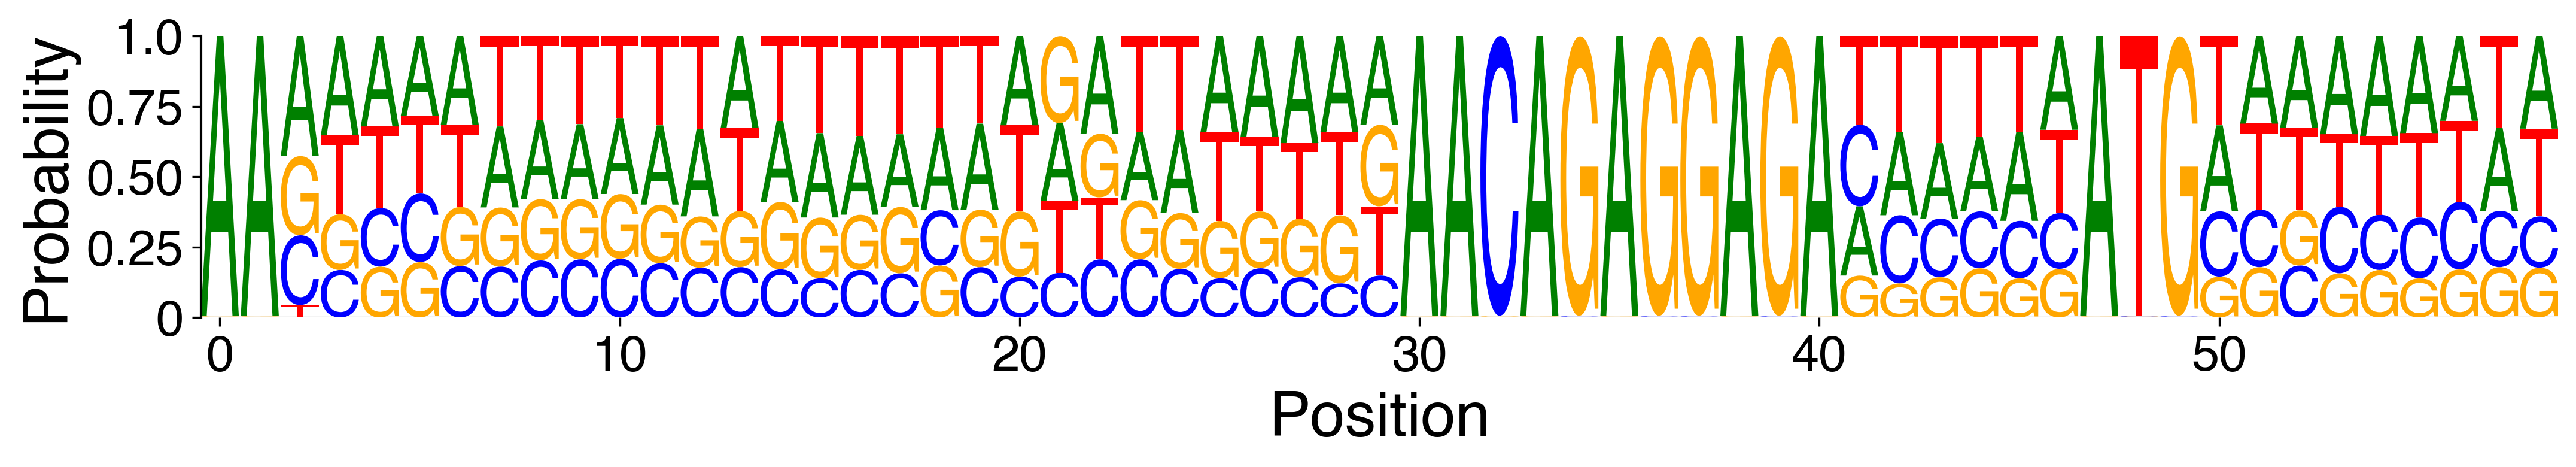

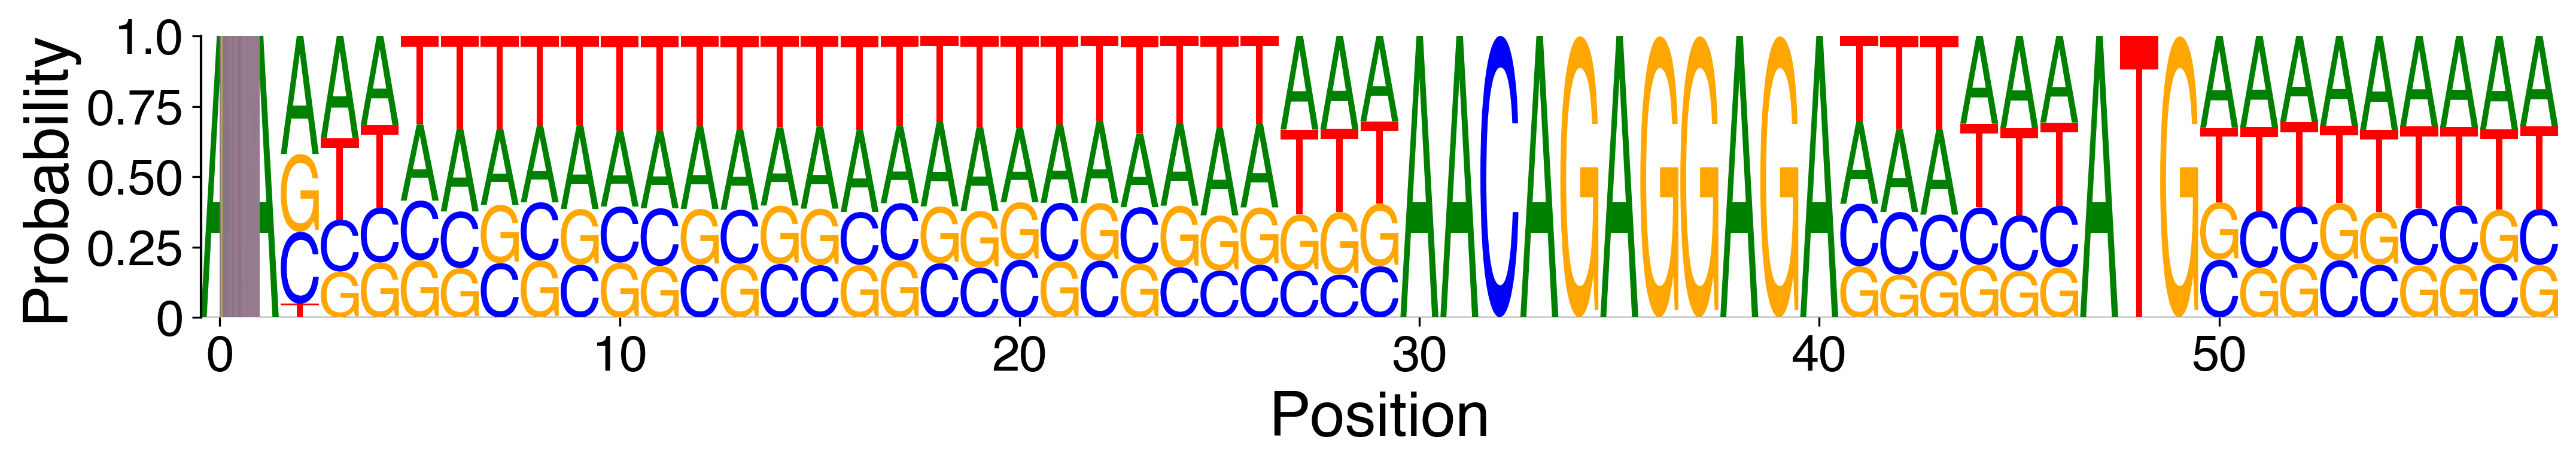

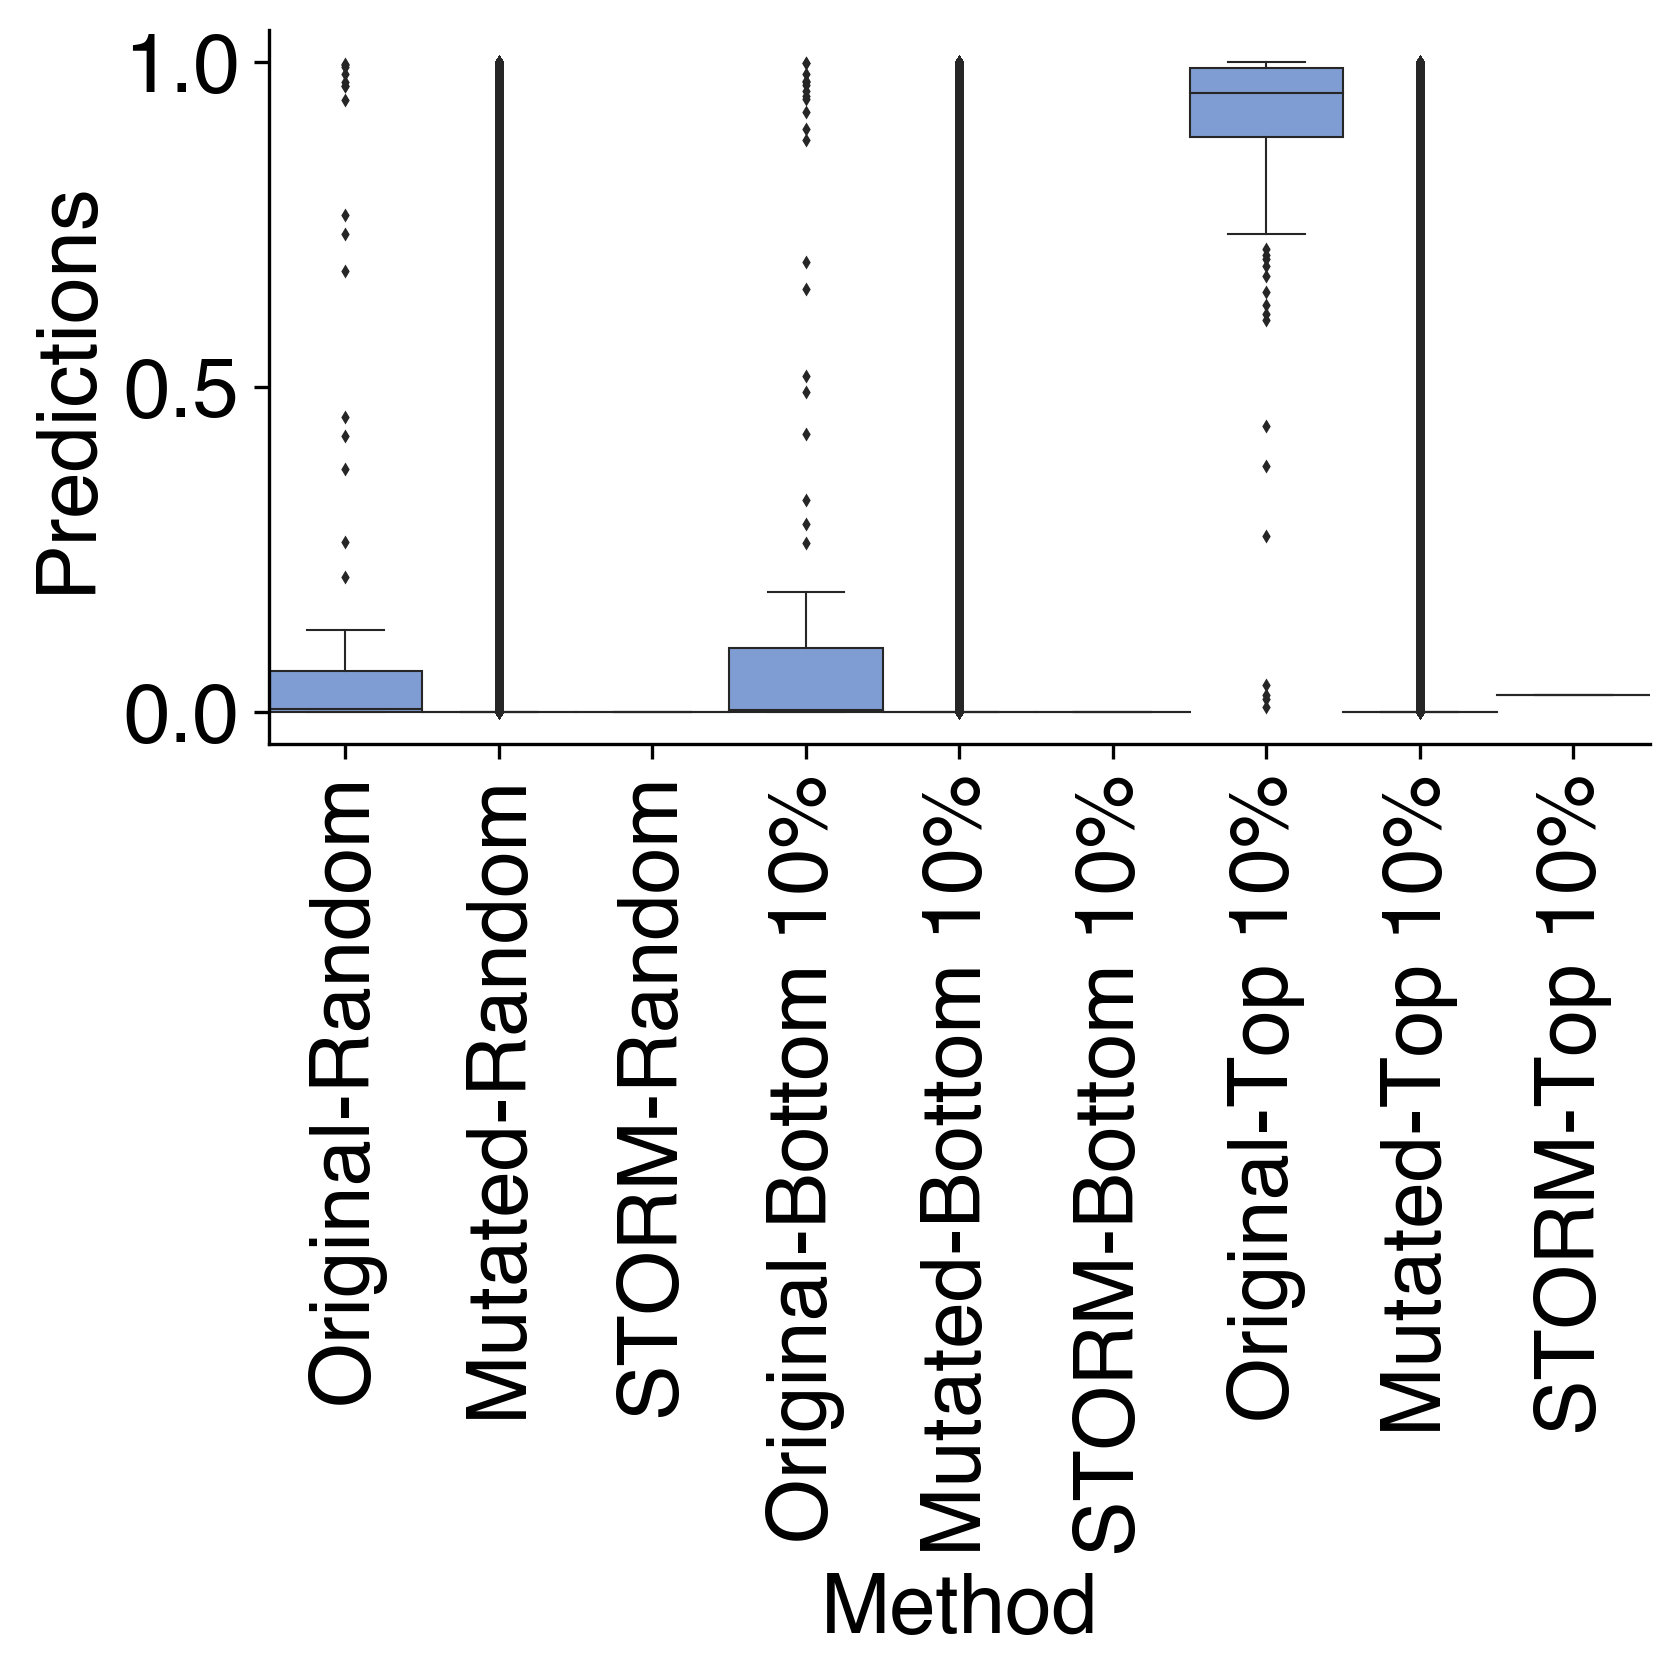

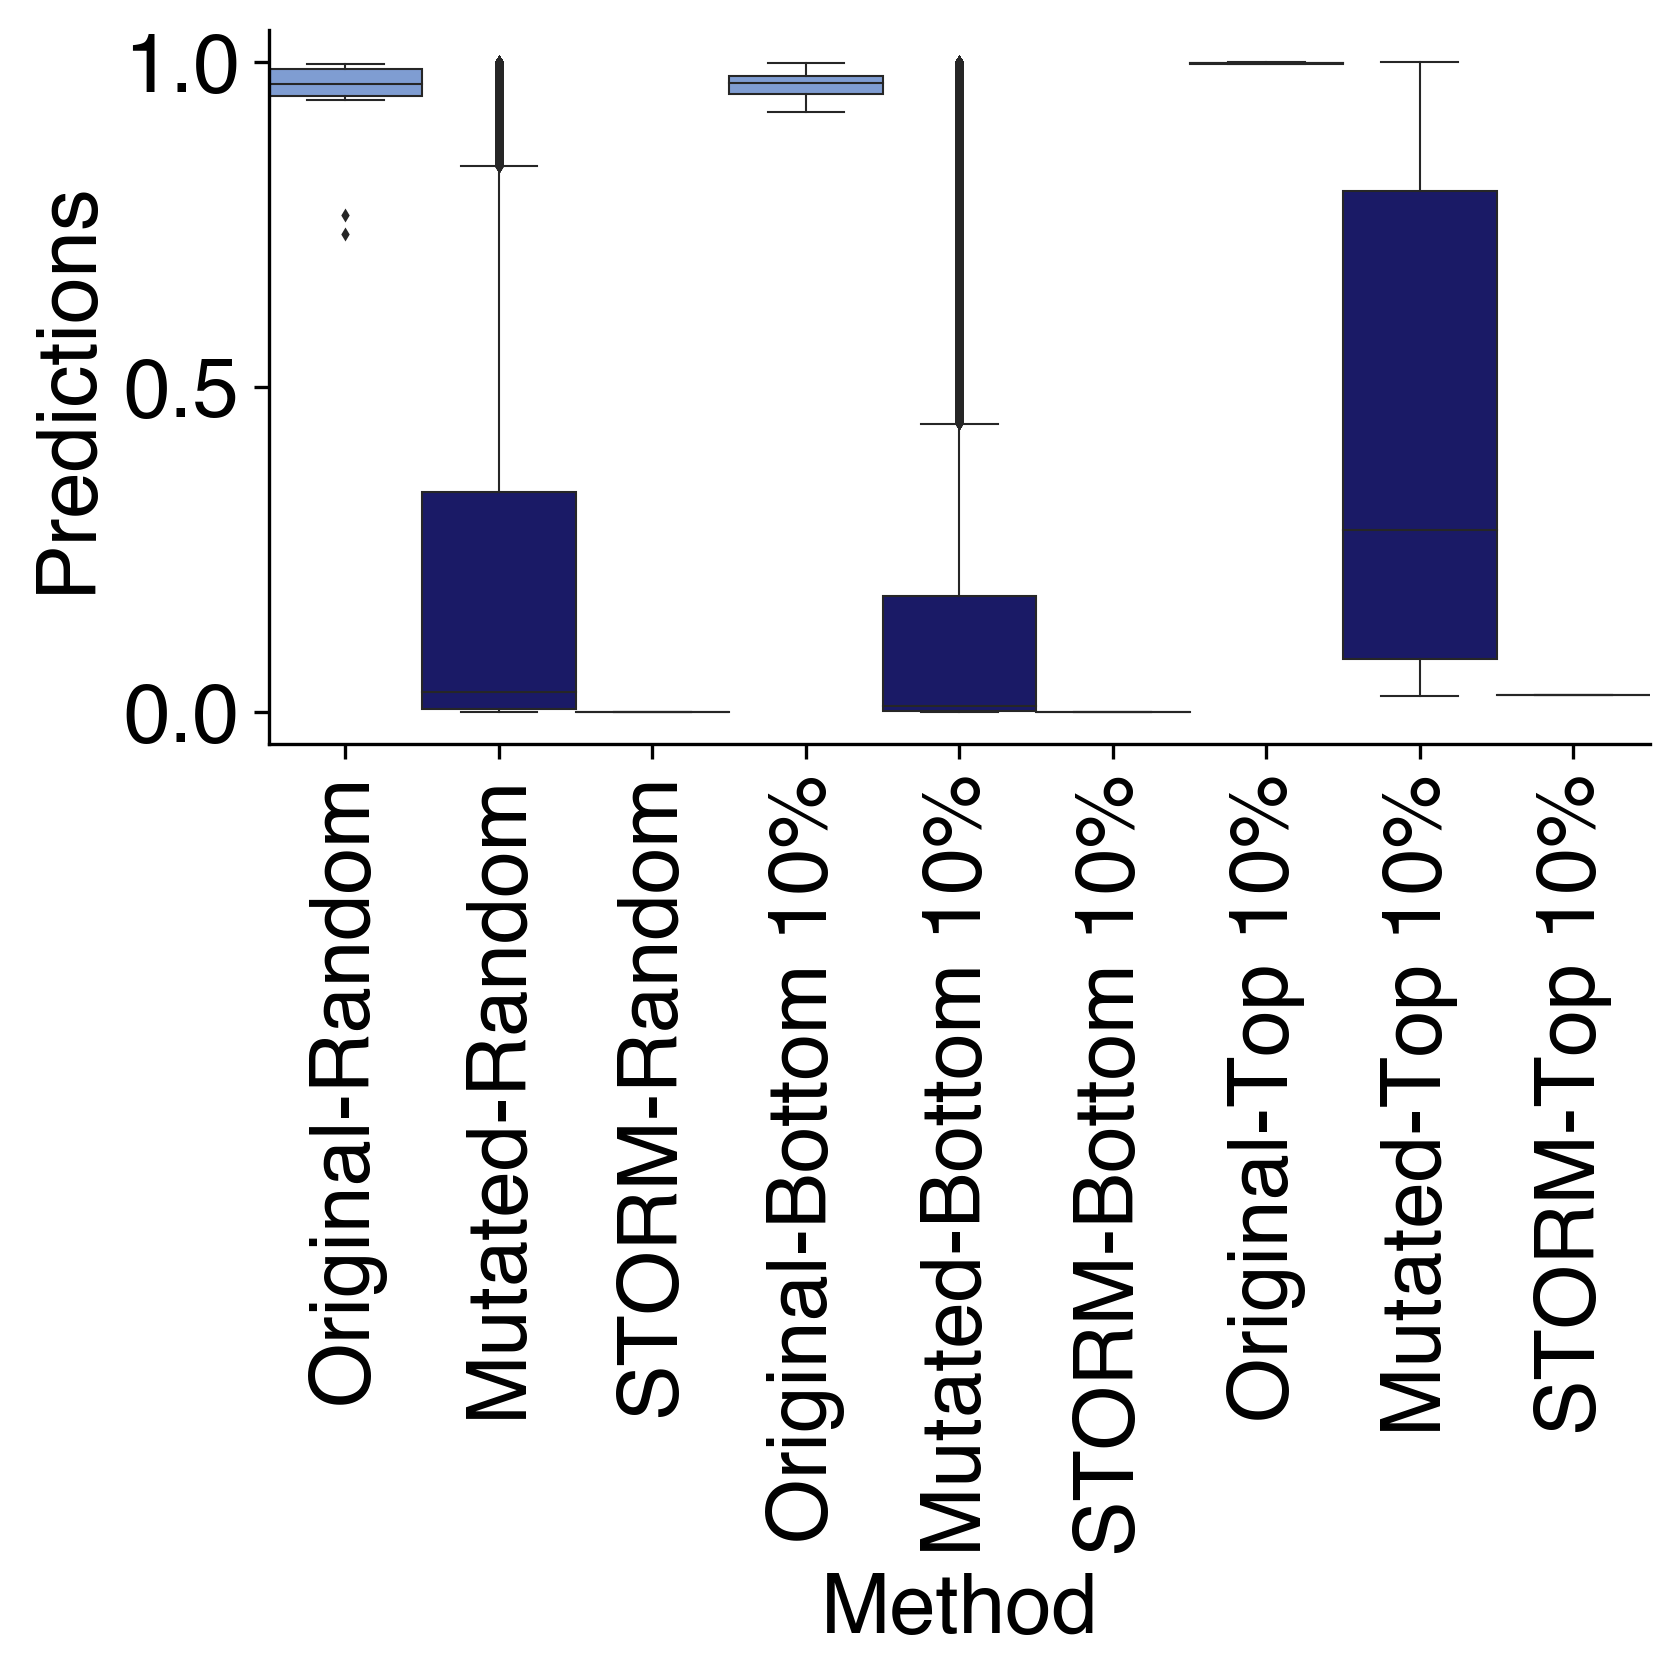

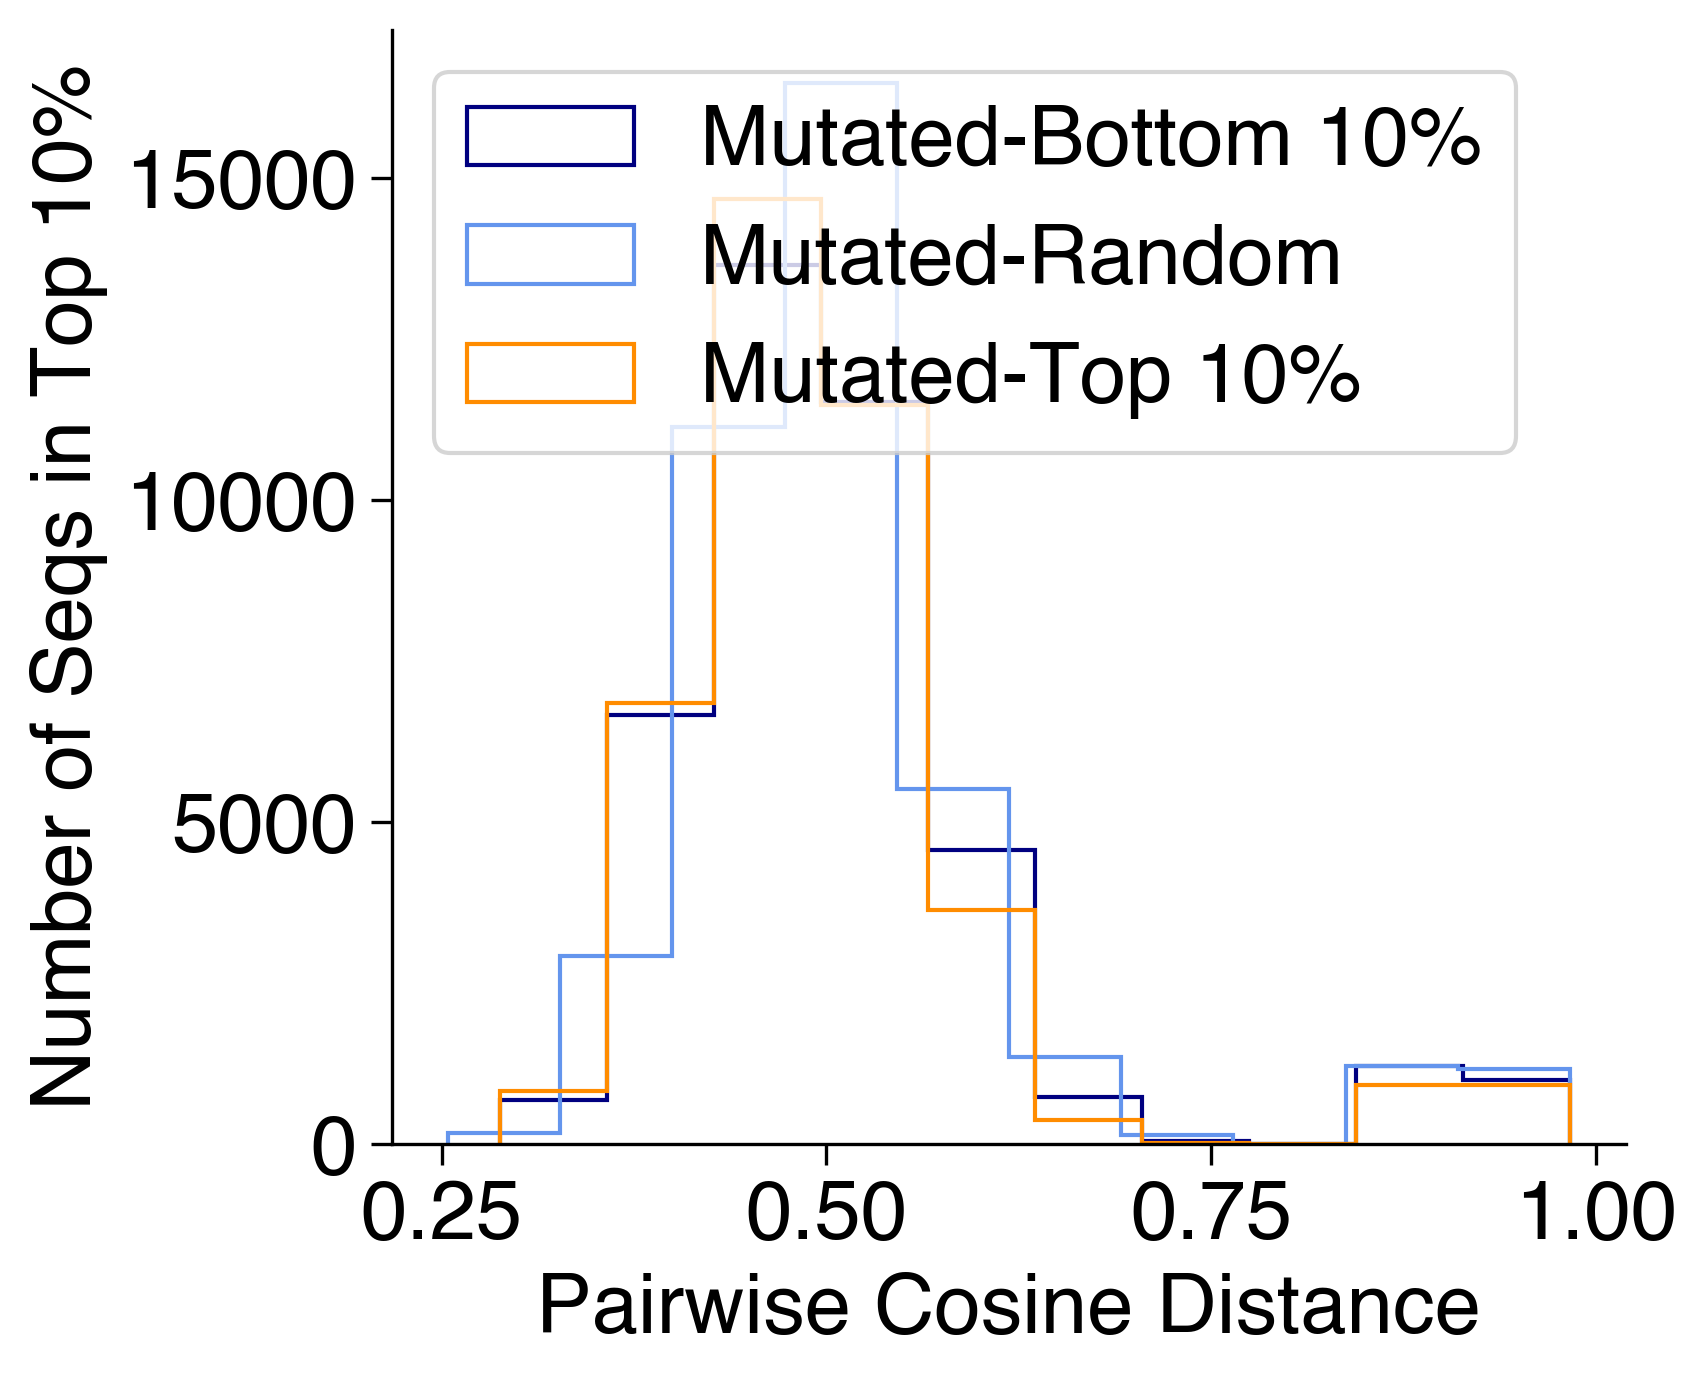

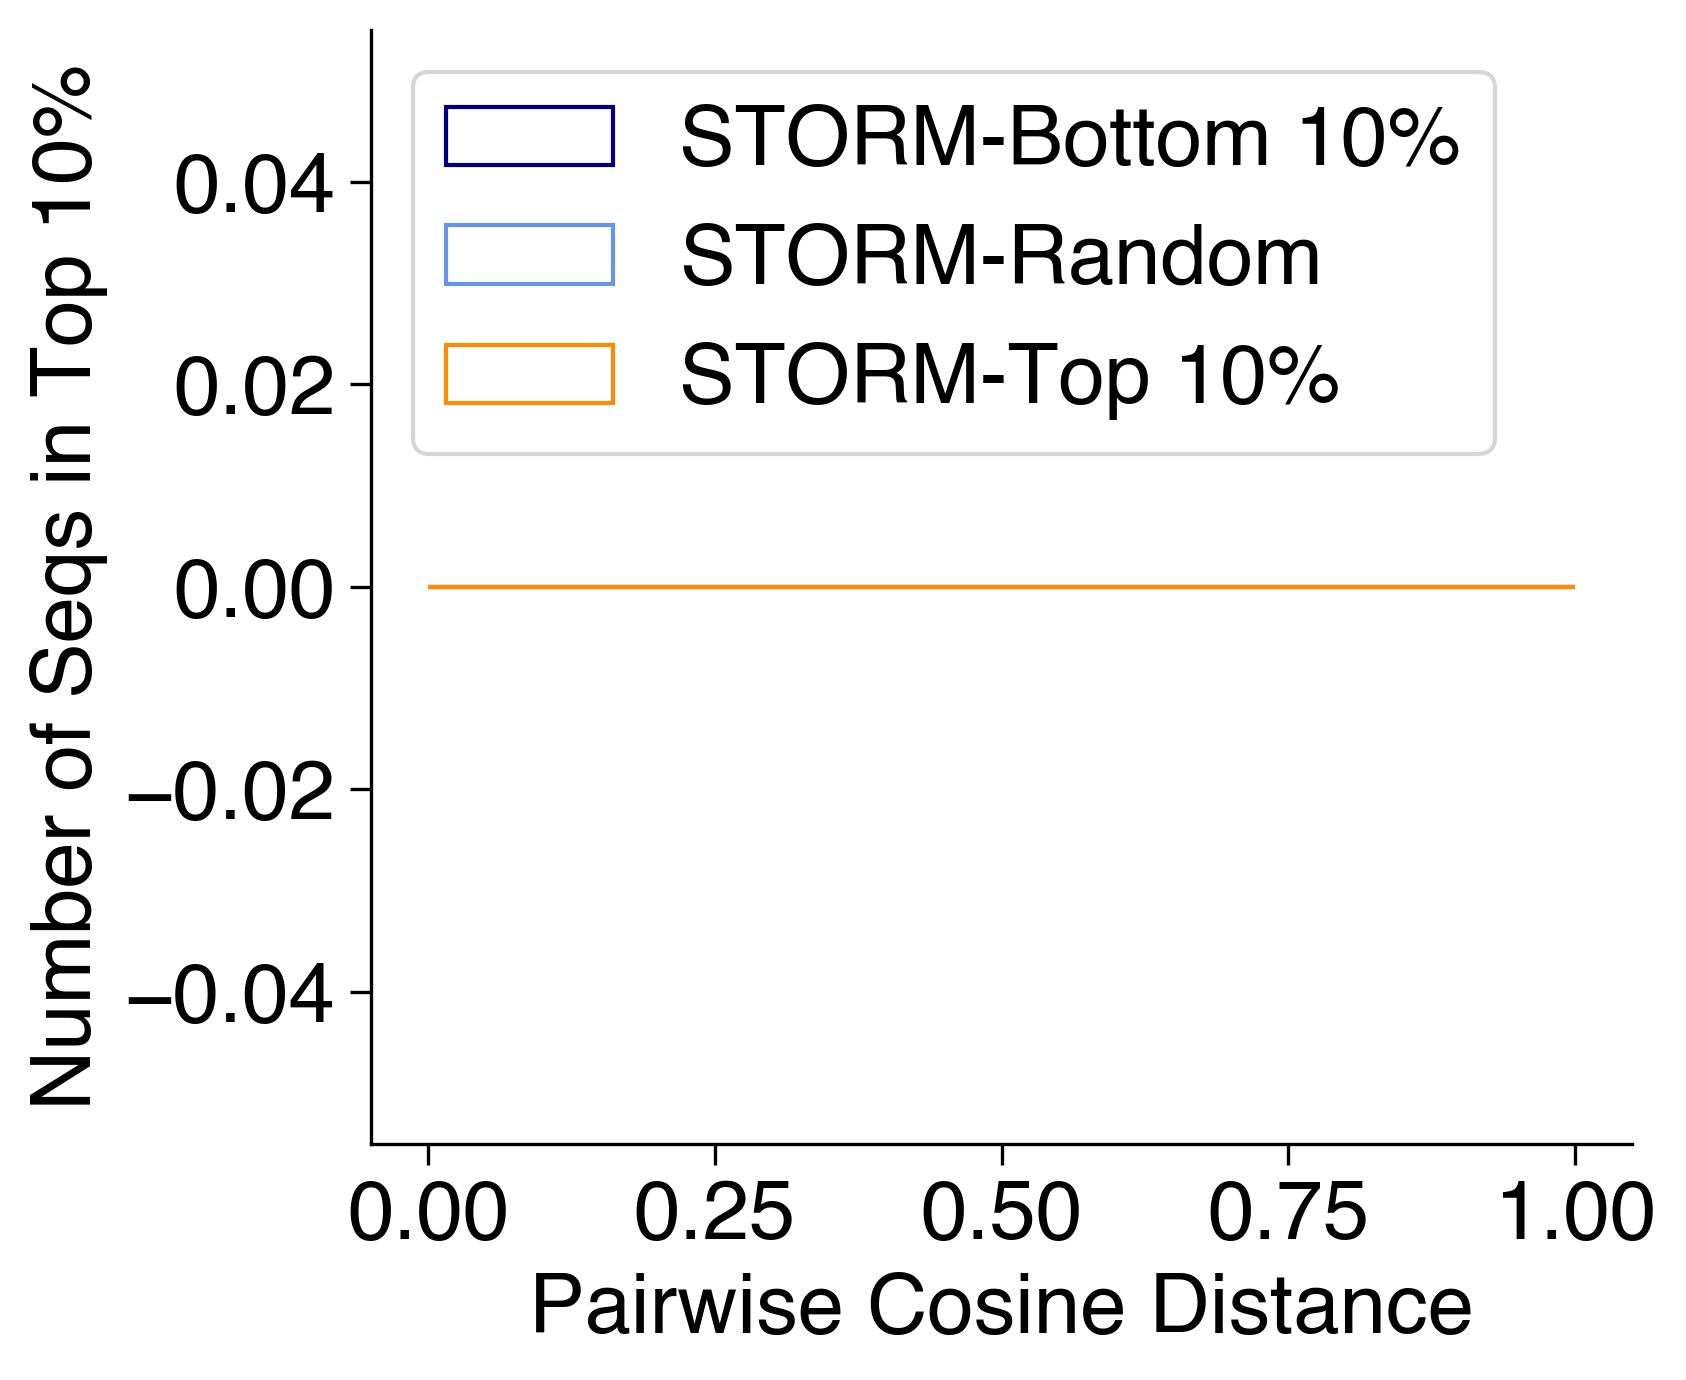

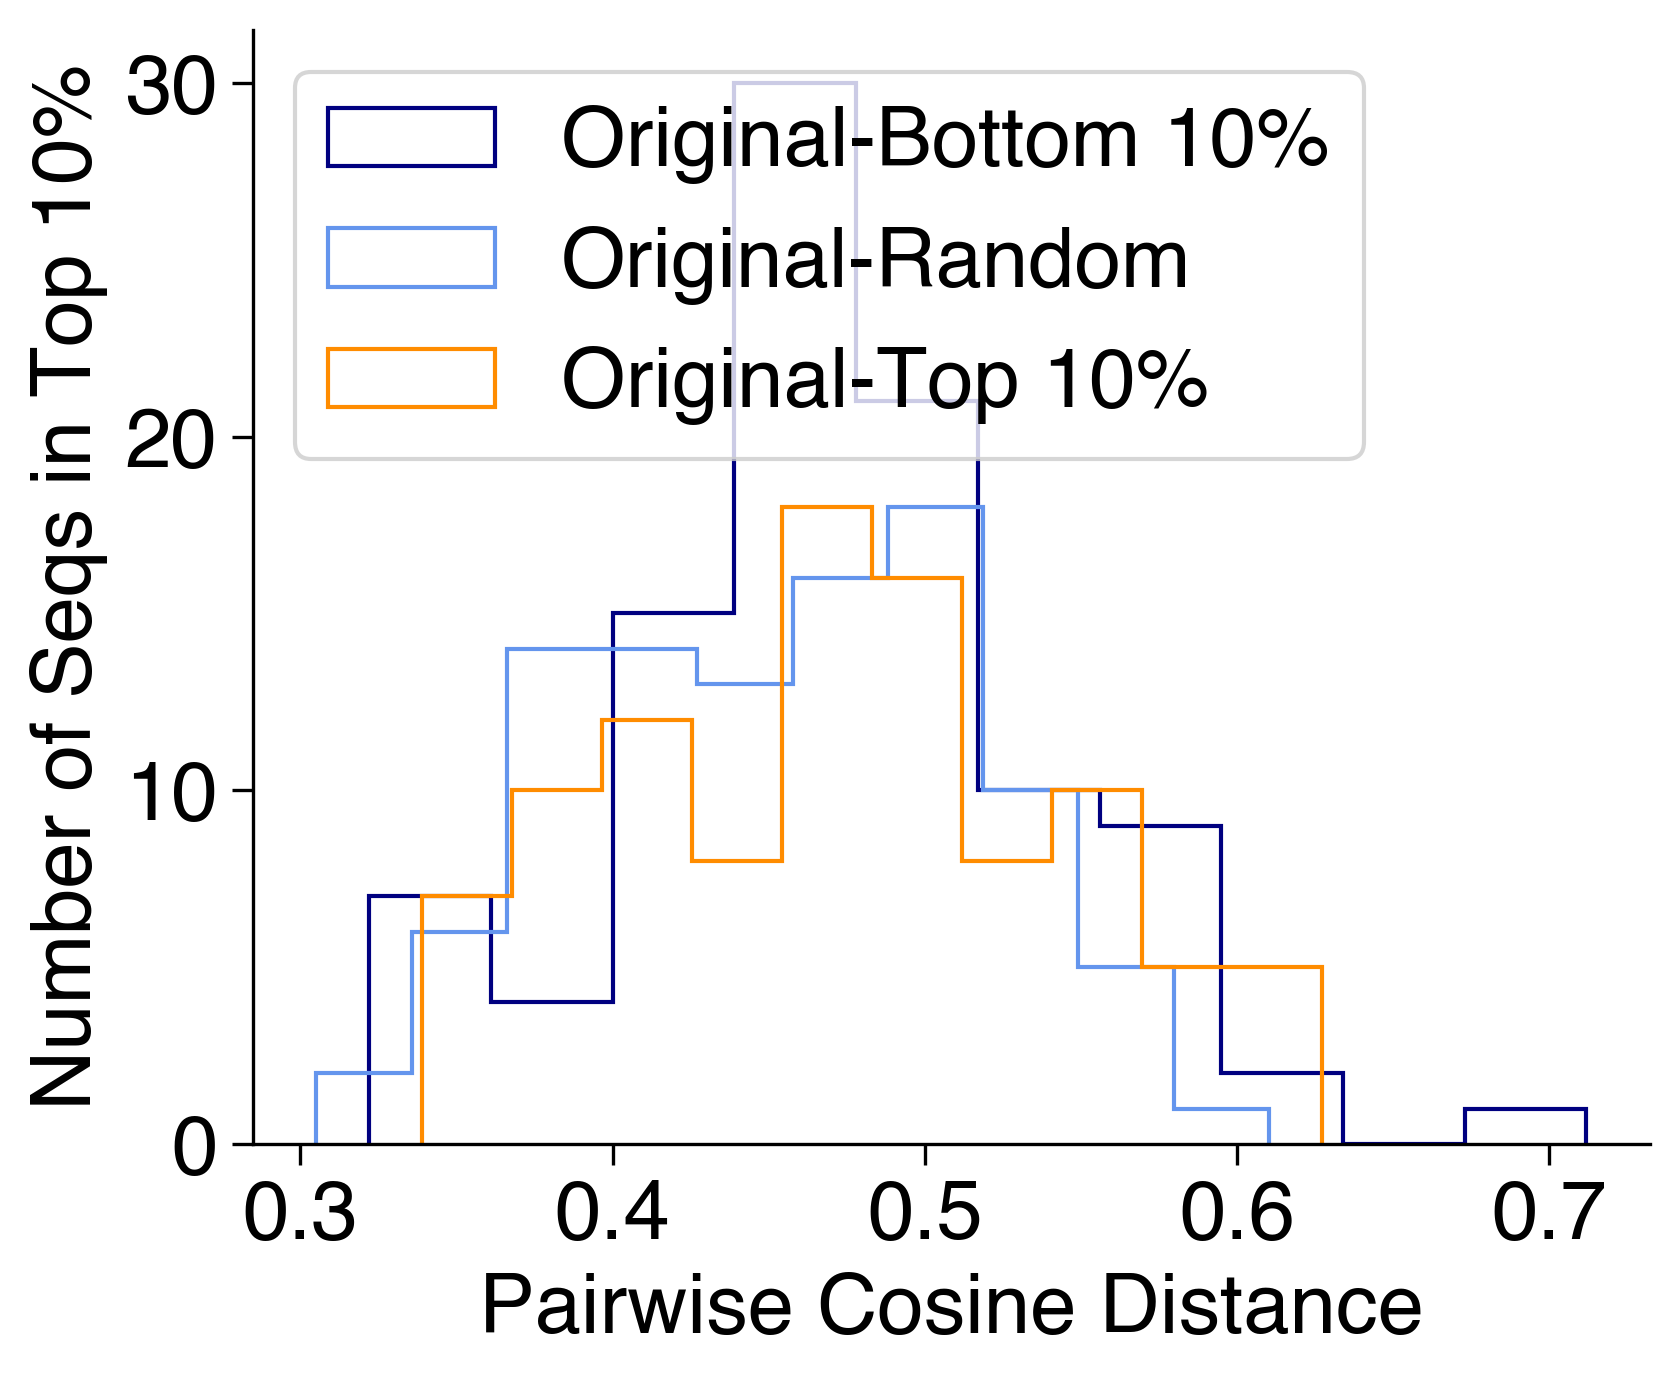

In [2]:
# read in data file
data_dir = './clean_data/clean/'
file_name = 'toeholds.csv'
data_df = pd.read_csv(data_dir + file_name,sep=',')
data_df = data_df.iloc[0:5000,:]
data_df.head(3)
constraint_file_path = './clean_data/toehold_constraints.xlsx'

# give inputs for data generation
input_col_name = 'seq'
df_data_input = data_df[input_col_name]
df_data_output = data_df['target']
pad_seqs = False
augment_data = 'none'
sequence_type = 'nucleic_acid'

# give inputs for paths
final_model_path = './final_exemplars/toeholds/outputs/deepswarm/binary_classification/'
final_model_name = 'deepswarm_deploy_model.h5'
model_type = 'deepswarm'
output_folder = final_model_path
plot_path = final_model_path + 'design/'
plot_name = '_design.png'

# give inputs for design options
design_params = {'k' : 3, 
                'substitution_type' : 'constrained_random',
                'target_y' : 1,
                'class_of_interest' : 1, # must be zero if task is regression, recommend to be 3 if task if multi-class classification with 4 classes
                'constraint_file_path' : constraint_file_path,
                'de_novo_num_seqs_to_test' : 100,
                'storm_num_seqs_to_test' : 1,
                 'num_of_optimization_rounds' : 5}

# format data inputs appropriately for autoML platform
numerical_data_input, oh_data_input, df_data_output, scrambled_numerical_data_input, scrambled_oh_data_input, alph = convert_deepswarm_input(df_data_input, df_data_output, pad_seqs, augment_data, sequence_type)

# handle numerical data inputs
numerical = []
numericalbool = True
for x in list(df_data_output.values):
    try:
        x = float(x)
        numerical.append(x)
    except Exception as e:
        numericalbool = False
        break

# now do design
integrated_design(numerical_data_input, oh_data_input, alph, numerical, numericalbool, final_model_path, final_model_name, output_folder + 'design/', '_design.png', sequence_type, model_type = 'deepswarm', design_params = design_params)
